In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
        .appName('ML-Projet') \
        .config("spark.executor.memory", "2g") \
        .master("spark://39ca8d87675a:7077")\
        .getOrCreate()

In [14]:
from kafka import KafkaProducer, KafkaConsumer
from datetime import datetime
from json import dumps
import pandas as pd
from time import sleep
from pymongo import MongoClient
import numpy as np
import json
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets 
from ipywidgets import *
from pyspark.ml.feature import VectorAssembler

In [3]:

producer = KafkaProducer(bootstrap_servers=['kafka:9092'],value_serializer=lambda x: dumps(x, separators=(".", ":")).encode('utf-8'),api_version=(2,0,2))

def send_csv_to_kafka():
    with open('/opt/workspace/mobile-churn-data.csv') as file:
        csv_reader = csv.reader(file, delimiter=';')
        next(csv_reader, None)
        for row in (csv_reader):
            message = {
                'year': int(row[0]),
                'month': int(row[1]),
                'user_account_id': int(row[2]),
                'user_lifetime': int(row[3]),
                # 'user_intake' : int(row[4]),
                # 'user_no_outgoing_activity_in_days': int(row[5]),
                # 'user_account_balance_last': float(row[6]),
                # 'user_spendings': float(row[7]),
                # 'user_has_outgoing_calls': int(row[8]), 
                # 'user_has_outgoing_sms': int(row[9]),
                # 'user_use_gprs': int(row[10]),
                # 'user_does_reload': int(row[11]),
                # 'reloads_inactive_days': int(row[12]),
                # 'reloads_count': int(row[13]),
                # 'reloads_sum': float(row[14]),
                # 'calls_outgoing_count': int(row[15]),
                # 'calls_outgoing_spendings': float(row[16]),
                # 'calls_outgoing_duration': float(row[17]),
                # 'calls_outgoing_spendings_max': float(row[18]),
                # 'calls_outgoing_duration_max': float(row[19]),
                # 'calls_outgoing_inactive_days': int(row[20]),
                # 'calls_outgoing_to_onnet_count': int(row[21]),
                # 'calls_outgoing_to_onnet_spendings': float(row[22]),
                # 'calls_outgoing_to_onnet_duration': float(row[23]),
                # 'calls_outgoing_to_onnet_inactive_days': int(row[24]),
                # 'calls_outgoing_to_offnet_count': int(row[25]),
                # 'calls_outgoing_to_offnet_spendings' : float(row[26]),
                # 'calls_outgoing_to_offnet_duration' : float(row[27]), 
                # 'calls_outgoing_to_offnet_inactive_days': int(row[28]),
                # 'calls_outgoing_to_abroad_count': int(row[29]),
                # 'calls_outgoing_to_abroad_spendings': float(row[30]),
                # 'calls_outgoing_to_abroad_duration': float(row[31]),
                # 'calls_outgoing_to_abroad_inactive_days': int(row[32]),
                # 'sms_outgoing_count': int(row[33]),
                # 'sms_outgoing_spendings': float(row[34]),
                # 'sms_outgoing_spendings_max': float(row[35]),
                # 'sms_outgoing_inactive_days': int(row[36]),
                # 'sms_outgoing_to_onnet_count': int(row[37]),
                # 'sms_outgoing_to_onnet_spendings': float(row[38]),
                # 'sms_outgoing_to_onnet_inactive_days': int(row[39]),
                # 'sms_outgoing_to_offnet_count': int(row[40]),
                # 'sms_outgoing_to_offnet_spendings': float(row[41]),
                # 'sms_outgoing_to_offnet_inactive_days': int(row[42]),
                # 'sms_outgoing_to_abroad_count': int(row[43]),
                # 'sms_outgoing_to_abroad_spendings': float(row[44]),
                # 'sms_outgoing_to_abroad_inactive_days': int(row[45]),
                # 'sms_incoming_count': int(row[46]),
                # 'sms_incoming_spendings': float(row[47]),
                # 'sms_incoming_from_abroad_count': int(row[48]),
                # 'sms_incoming_from_abroad_spendings': float(row[49]),
                # 'gprs_session_count': int(row[50]),
                # 'gprs_usage': float(row[51]),
                # 'gprs_spendings': float(row[52]),
                # 'gprs_inactive_days': int(row[53]),
                # 'last_100_reloads_count': int(row[54]),
                # 'last_100_reloads_sum': float(row[55]),
                # 'last_100_calls_outgoing_duration': float(row[56]),
                # 'last_100_calls_outgoing_to_onnet_duration': float(row[57]),
                # 'last_100_calls_outgoing_to_offnet_duration': float(row[58]),
                # 'last_100_calls_outgoing_to_abroad_duration': float(row[59]),
                # 'last_100_sms_outgoing_count': int(row[60]),
                # 'last_100_sms_outgoing_to_onnet_count': int(row[61]),
                # 'last_100_sms_outgoing_to_offnet_count': int(row[62]),
                # 'last_100_sms_outgoing_to_abroad_count': int(row[63]),
                # 'last_100_gprs_usage': float(row[64]),
                # 'churn': int(row[65]),
            }
            producer.send('churn-data', value = message)
            # print("Churn: ", row)
            # print((message))
            # print(type(message))
            sleep(1)
send_csv_to_kafka()

KeyboardInterrupt: 

In [12]:
producer_telecom = KafkaProducer(bootstrap_servers=['kafka:9092'],value_serializer=lambda x: dumps(x, separators=(",", ":")).encode('utf-8'),api_version=(2,0,2))

def send_csv_telecom_to_kafka():
    with open('/opt/workspace/Telecom_Company_Call-Center-Dataset.csv') as file:
        csv_reader = csv.reader(file, delimiter=';')
        next(csv_reader, None)
        for row in (csv_reader):
            # data = {  
            #     'Call Id' : row[0],
            #     'Agent' : row[1],
            #     'Date' : row[2],
            #     'Time' : row[3],
            #     'Topic' : row[4],
            #     'Answered (Y/N)': row[5],
            #     'Resolved' : row [6],
            #     'Speed of answer in seconds' : row[7],
            #     'AvgTalkDuration' : row[8],
            #     'Satisfaction rating' : row[9]
            # }
            Date = row[5]
            # producer_telecom.send('test_test' , value = data)
            print(type(Date))
            sleep(2)
send_csv_telecom_to_kafka()

<class 'str'>


KeyboardInterrupt: 

In [15]:
# Connexion à MongoDB Atlas
# client = MongoClient("mongodb://localhost:27017")
# db = client["Archi_dist"]
# collection = db["Data_Telecom"]

# from json import loads
# consumer = KafkaConsumer(
#     'test_stream',
#      bootstrap_servers=['kafka:9092'],
#      auto_offset_reset='earliest',
#      enable_auto_commit=True,
#      group_id='my-group',
#      value_deserializer=lambda x: loads(x, separators=(",", ":")).decode('utf-8'))
    
# for message in consumer:
#     print(message.value)

from json import loads
consumer =  KafkaConsumer(
    'test_stream',
     bootstrap_servers=['kafka:9092'],
     auto_offset_reset='earliest',
     enable_auto_commit=True,
     group_id='my-group',
     value_deserializer=lambda x: loads(x, separators=(",", ":")).decode('utf-8'))

for meg in consumer: 
    print(meg.value)

KeyboardInterrupt: 

In [3]:
data_churn = pd.read_csv('/opt/workspace/mobile-churn-data.csv', delimiter=';')
data_churn.head(10)

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
0,2013,6,13,1000,0,1,0.05,0.00,1,1,...,75.27,0.00,63.43,0.00,210,1,84,0,0.00,0
1,2013,6,14,1000,0,25,28.31,3.45,1,0,...,13.38,11.18,2.00,11.18,0,0,0,0,0.00,0
2,2013,6,18,1005,0,8,15.62,1.97,1,0,...,30.00,0.00,0.00,10.45,0,0,0,0,0.00,0
3,2013,6,27,1013,0,11,5.62,0.00,1,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0.00,1
4,2013,6,32,1032,0,2,5.86,0.15,1,0,...,2.58,0.00,1.00,0.00,0,0,0,0,0.00,0
5,2013,6,35,1039,0,1,12.51,12.96,1,1,...,356.65,0.00,215.83,0.00,4,1,1,0,0.00,0
6,2013,6,36,1040,0,1,16.73,2.34,1,1,...,0.00,0.00,0.00,0.00,112,0,109,0,0.00,0
7,2013,6,47,521,0,1,0.66,45.89,1,1,...,735.87,0.00,473.50,0.00,1123,0,1006,0,0.00,0
8,2013,6,52,824,0,2,4.49,1.37,1,1,...,56.22,0.00,48.02,0.00,122,1,1,0,2.77,0
9,2013,6,59,867,0,2,90.93,17.99,1,1,...,587.85,0.00,585.55,0.00,19,0,19,0,0.00,0


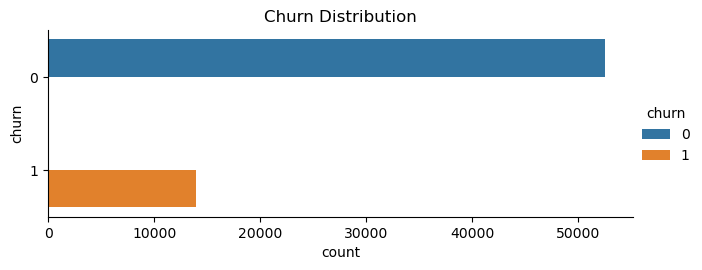

20.922535317215544 % churners


In [4]:
ax = sns.catplot(y="churn", kind="count", data=data_churn, hue= 'churn', palette = 'tab10', height=2.6, aspect=2.5, orient='h')
plt.title('Churn Distribution')
plt.show()

#pourcentage des churners 
prop_churn = sum(data_churn['churn'] == 1) / len(data_churn['churn'])*100
print(str(prop_churn) + ' % churners')

# D'après ce graphe on constate que la majorité des clients ne sont pas désabonnés (environ 80%)
# D'autre par notre dataset présente un problème de déséquilibre qui peut impacter négativement la performance des modèles de classification que nous allons créer

In [5]:
b = data_churn.nunique()[data_churn.nunique() < 5].keys().to_list()

In [6]:
dd = widgets.Dropdown(options= b, value=b[0], description= 'Column')
def draw_countplot(column):
    p = sns.countplot(data=data_churn, x= column, hue='churn', palette='plasma')
    if len(data_churn[column].unique()) > 4 :
        p.tick_params(axis='x', rotation =90)
    plt.title('Distribution de ' + str(column))
    return plt.show()
              
interact(draw_countplot, column=dd)

interactive(children=(Dropdown(description='Column', options=('year', 'month', 'user_intake', 'user_has_outgoi…

<function __main__.draw_countplot(column)>

# Data Processing

In [7]:
df_1= data_churn[data_churn['churn']==1]
df_1_final = df_1[:13907]
df_1_final

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
3,2013,6,27,1013,0,11,5.62,0.00,1,0,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
11,2013,6,69,769,0,90,30.01,0.00,0,0,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
12,2013,6,73,732,0,28,2.42,3.68,1,1,...,15.48,0.0,1.0,0.0,26,0,1,0,0.0,1
20,2013,6,104,15885,0,1276,0.00,0.00,0,0,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
50,2013,6,279,15885,0,8,0.00,0.00,1,0,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66461,2013,8,1196934,15947,0,1,0.00,0.00,0,0,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
66462,2013,8,1196935,15947,0,1,0.00,0.00,0,0,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
66463,2013,8,1196936,15947,0,1,0.00,0.00,0,0,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1
66464,2013,8,1196937,15947,0,1,0.00,0.00,0,0,...,0.00,0.0,0.0,0.0,0,0,0,0,0.0,1


In [8]:
df_0= data_churn[data_churn['churn']==0]
df_0_final = df_0[:13907]
df_0_final

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
0,2013,6,13,1000,0,1,0.05,0.00,1,1,...,75.27,0.00,63.43,0.00,210,1,84,0,0.0,0
1,2013,6,14,1000,0,25,28.31,3.45,1,0,...,13.38,11.18,2.00,11.18,0,0,0,0,0.0,0
2,2013,6,18,1005,0,8,15.62,1.97,1,0,...,30.00,0.00,0.00,10.45,0,0,0,0,0.0,0
4,2013,6,32,1032,0,2,5.86,0.15,1,0,...,2.58,0.00,1.00,0.00,0,0,0,0,0.0,0
5,2013,6,35,1039,0,1,12.51,12.96,1,1,...,356.65,0.00,215.83,0.00,4,1,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283,2013,6,217538,1805,0,2,5.99,1.47,1,1,...,0.45,0.00,0.00,0.45,28,0,2,26,0.0,0
15284,2013,6,217589,1640,0,3,6.64,1.62,0,1,...,1.57,0.00,1.00,0.00,111,0,101,7,0.0,0
15285,2013,6,217593,1719,0,5,1.05,0.25,1,0,...,8.32,0.00,3.00,0.00,0,0,0,0,0.0,0
15286,2013,6,217594,1847,0,1,18.29,5.71,1,1,...,48.45,1.50,37.23,8.28,156,0,66,39,0.0,0


In [9]:
df_after_concat =pd.concat([df_0_final, df_1_final], ignore_index=True)

In [11]:
df_after_concat.to_csv('/opt/workspace/balanced_data', header=True)

In [12]:
df = spark.read.csv('/opt/workspace/balanced_data', header=True)

In [13]:
df.show()

+---+----+-----+---------------+-------------+-----------+---------------------------------+-------------------------+--------------+-----------------------+---------------------+-------------+----------------+---------------------+-------------+-----------+--------------------+------------------------+-----------------------+----------------------------+---------------------------+----------------------------+-----------------------------+---------------------------------+--------------------------------+-------------------------------------+------------------------------+----------------------------------+---------------------------------+--------------------------------------+------------------------------+----------------------------------+---------------------------------+--------------------------------------+------------------+----------------------+--------------------------+--------------------------+---------------------------+-------------------------------+-----------------

In [14]:
dfSummary = df.summary().show(truncate=False)

+-------+---------------+------+------------------+------------------+-----------------+--------------------+---------------------------------+-------------------------+------------------+-----------------------+---------------------+--------------------+-------------------+---------------------+------------------+------------------+--------------------+------------------------+-----------------------+----------------------------+---------------------------+----------------------------+-----------------------------+---------------------------------+--------------------------------+-------------------------------------+------------------------------+----------------------------------+---------------------------------+--------------------------------------+------------------------------+----------------------------------+---------------------------------+--------------------------------------+------------------+----------------------+--------------------------+--------------------------+

In [15]:
df.groupBy('churn').count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    0|13907|
|    1|13907|
+-----+-----+



# ==> dataset équilibrée

In [16]:
# Vérification de la présence des valeurs manquantes / nulles
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+----+-----+---------------+-------------+-----------+---------------------------------+-------------------------+--------------+-----------------------+---------------------+-------------+----------------+---------------------+-------------+-----------+--------------------+------------------------+-----------------------+----------------------------+---------------------------+----------------------------+-----------------------------+---------------------------------+--------------------------------+-------------------------------------+------------------------------+----------------------------------+---------------------------------+--------------------------------------+------------------------------+----------------------------------+---------------------------------+--------------------------------------+------------------+----------------------+--------------------------+--------------------------+---------------------------+-------------------------------+-----------------

In [17]:
#Suppression des variables non nécessaires
unuseful_columns= ['_c0','year','user_account_id']
cleaned_df = df.drop(*unuseful_columns)
cleaned_df.show(2)

+-----+-------------+-----------+---------------------------------+-------------------------+--------------+-----------------------+---------------------+-------------+----------------+---------------------+-------------+-----------+--------------------+------------------------+-----------------------+----------------------------+---------------------------+----------------------------+-----------------------------+---------------------------------+--------------------------------+-------------------------------------+------------------------------+----------------------------------+---------------------------------+--------------------------------------+------------------------------+----------------------------------+---------------------------------+--------------------------------------+------------------+----------------------+--------------------------+--------------------------+---------------------------+-------------------------------+-----------------------------------+------

In [19]:
cleaned_df = cleaned_df.select(*(col(c).cast("float").alias(c) for c in cleaned_df.columns))
cleaned_df.show(20)

+-----+-------------+-----------+---------------------------------+-------------------------+--------------+-----------------------+---------------------+-------------+----------------+---------------------+-------------+-----------+--------------------+------------------------+-----------------------+----------------------------+---------------------------+----------------------------+-----------------------------+---------------------------------+--------------------------------+-------------------------------------+------------------------------+----------------------------------+---------------------------------+--------------------------------------+------------------------------+----------------------------------+---------------------------------+--------------------------------------+------------------+----------------------+--------------------------+--------------------------+---------------------------+-------------------------------+-----------------------------------+------

# Machine Learning Pipline 

In [21]:
output = fusion.transform(cleaned_df)

In [65]:
fusion = VectorAssembler(inputCols=['month','user_lifetime','user_intake','user_no_outgoing_activity_in_days',
                                    'user_account_balance_last',
                                    'user_spendings','user_has_outgoing_calls','user_has_outgoing_sms','user_use_gprs',
                                    'user_does_reload', 'reloads_inactive_days', 'reloads_count', 'reloads_sum',
                                    'calls_outgoing_count',
                                    'calls_outgoing_spendings','calls_outgoing_duration','calls_outgoing_spendings_max',
                                    'calls_outgoing_duration_max','calls_outgoing_inactive_days','calls_outgoing_to_onnet_count',
                                    'calls_outgoing_to_onnet_spendings','calls_outgoing_to_onnet_duration',
                                    'calls_outgoing_to_onnet_inactive_days','calls_outgoing_to_offnet_count',
                                    'calls_outgoing_to_offnet_spendings','calls_outgoing_to_offnet_duration',
                                    'calls_outgoing_to_offnet_inactive_days','calls_outgoing_to_abroad_count',
                                    'calls_outgoing_to_abroad_spendings','calls_outgoing_to_abroad_duration',
                                    'calls_outgoing_to_abroad_inactive_days','sms_outgoing_count','sms_outgoing_spendings',
                                    'sms_outgoing_spendings_max','sms_outgoing_inactive_days','sms_outgoing_to_onnet_count',
                                    'sms_outgoing_to_onnet_spendings','sms_outgoing_to_onnet_inactive_days',
                                    'sms_outgoing_to_offnet_count','sms_outgoing_to_offnet_spendings',
                                    'sms_outgoing_to_offnet_inactive_days','sms_outgoing_to_abroad_count',
                                    'sms_outgoing_to_abroad_spendings','sms_outgoing_to_abroad_inactive_days',
                                    'sms_incoming_count','sms_incoming_spendings','sms_incoming_from_abroad_count',
                                    'sms_incoming_from_abroad_spendings','gprs_session_count','gprs_usage','gprs_spendings',
                                    'gprs_inactive_days','last_100_reloads_count','last_100_reloads_sum',
                                    'last_100_calls_outgoing_duration','last_100_calls_outgoing_to_onnet_duration',
                                    'last_100_calls_outgoing_to_offnet_duration','last_100_calls_outgoing_to_abroad_duration',
                                    'last_100_sms_outgoing_count','last_100_sms_outgoing_to_onnet_count',
                                    'last_100_sms_outgoing_to_offnet_count','last_100_sms_outgoing_to_abroad_count',
                                    'last_100_gprs_usage'], outputCol="features")

In [66]:
final_output = output.select("features", 'churn')

In [67]:
final_output.show(5)

+--------------------+-----+
|            features|churn|
+--------------------+-----+
|(63,[0,1,3,4,6,7,...|  0.0|
|(63,[0,1,3,4,5,6,...|  0.0|
|(63,[0,1,3,4,5,6,...|  0.0|
|(63,[0,1,3,4,5,6,...|  0.0|
|(63,[0,1,3,4,5,6,...|  0.0|
+--------------------+-----+
only showing top 5 rows



In [68]:
train, test = final_output.randomSplit([0.7, 0.3], seed = 10)


# Logistic Regression

In [69]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol="churn", featuresCol="features", maxIter=10)


lrModel = lr.fit(train)
lrModelSummary = lrModel.summary

In [70]:
accuracy =lrModelSummary.accuracy
falsePositiveRate = lrModelSummary.weightedFalsePositiveRate
truePositiveRate = lrModelSummary.weightedTruePositiveRate
fMeasure = lrModelSummary.weightedFMeasure()
precision = lrModelSummary.weightedPrecision
recall = lrModelSummary.weightedRecall
print("Accuracy : %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s\nAreaUnderROC: %s"% (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall,
                                                                                                      lrModelSummary.areaUnderROC))

Accuracy : 0.8789064511146579
FPR: 0.12097391451330475
TPR: 0.8789064511146578
F-measure: 0.8788235488617049
Precision: 0.8800527492683874
Recall: 0.8789064511146578
AreaUnderROC: 0.9344474454519788


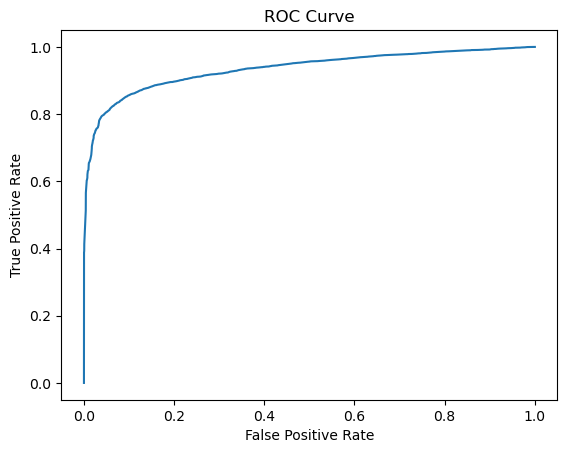

Training set areaUnderROC: 0.9344474454519788


In [71]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [72]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import DecisionTreeClassifier

In [73]:
predictions = lrModel.transform(test)

evaluatorLR = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol = 'churn')
area_under_curveLR = evaluatorLR.evaluate(predictions,{evaluatorLR.metricName: "areaUnderROC"})

print("Area Under Curve = %g" % area_under_curveLR)


Area Under Curve = 0.875269


In [74]:
predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(63,[0,1,2,3,4,5,...|  1.0|[-3.2152674128057...|[0.03859520812441...|       1.0|
|(63,[0,1,2,3,4,5,...|  1.0|[-4.9072014042205...|[0.00733889231365...|       1.0|
|(63,[0,1,2,3,4,5,...|  1.0|[-6.5064280769944...|[0.00149157783695...|       1.0|
|(63,[0,1,2,3,4,5,...|  0.0|[-6.5221490008748...|[0.00146834637503...|       1.0|
|(63,[0,1,2,3,4,5,...|  1.0|[-6.3898841069720...|[0.00167563823466...|       1.0|
|(63,[0,1,2,3,4,6,...|  1.0|[-6.5781614005784...|[0.00138847280373...|       1.0|
|(63,[0,1,2,3,6,9,...|  1.0|[-6.7546035716124...|[0.00116414496770...|       1.0|
|(63,[0,1,3,4,5,6,...|  0.0|[1.62477345863386...|[0.83545239644567...|       0.0|
|(63,[0,1,3,4,5,6,...|  0.0|[1.36652515917425...|[0.79681816058781...|       0.0|
|(63,[0,1,3,4,5,

In [75]:
resultsLR = predictions.select(['prediction', 'churn'])

count = predictions.count()
correct = resultsLR.filter(resultsLR.prediction == resultsLR.churn).count()
wrong = resultsLR.filter(resultsLR.prediction != resultsLR.churn).count()
tp = resultsLR.filter(resultsLR.prediction ==1.0).filter(resultsLR.prediction == resultsLR.churn).count()
fp = resultsLR.filter(resultsLR.prediction ==1.0).filter(resultsLR.prediction != resultsLR.churn).count()
fn = resultsLR.filter(resultsLR.prediction ==0.0).filter(resultsLR.prediction != resultsLR.churn).count()
tn = resultsLR.filter(resultsLR.prediction ==0.0).filter(resultsLR.prediction == resultsLR.churn).count()


accuracyLR = ((tp+tn)/count)*100
precisionLR = (tp/(tp+fp))*100
recallLR = (tp/(tp+fn))*100
print("Correct:{}\nWrong:{}\ntp:{}\nfp:{}\nfn:{}\ntn:{}\nAccuracy: {}\nPrecision: {}\nRecall: {}".format(correct, wrong, tp, fp, fn, tn, accuracyLR, precisionLR, recallLR))


Correct:7346
Wrong:1045
tp:3496
fp:367
fn:678
tn:3850
Accuracy: 87.54618043141461
Precision: 90.49961170075072
Recall: 83.75658840440823


In [76]:
resultsLR = pd.DataFrame([['Logistic Regression', accuracyLR, precisionLR, recallLR, area_under_curveLR ]], columns = ['Model', 'Accuracy', 'Precision', 'Recall','areaUnderROC' ])

resultsLR = resultsLR.sort_values(["Precision", "Recall", "areaUnderROC"], ascending = False)
print (resultsLR)

                 Model  Accuracy  Precision     Recall  areaUnderROC
0  Logistic Regression  87.54618  90.499612  83.756588      0.875269


In [77]:
paraGrid = (ParamGridBuilder()
            .addGrid(lr.regParam, [0.01, 0.5, 2.0])
            .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
            .addGrid(lr.maxIter, [5, 10, 20])
            .build())

In [78]:
cv = CrossValidator(estimator=lr, estimatorParamMaps=paraGrid, evaluator=evaluatorLR, numFolds=5)
cvModel = cv.fit(train)

In [79]:
predictions = cvModel.bestModel.transform(test)

In [80]:
# from pyspark.mllib.evaluation import BinaryClassificationMetrics

resultsModel = predictions.select(['prediction', 'churn'])

count = predictions.count()
correct = resultsModel.filter(resultsModel.prediction == resultsModel.churn).count()
wrong = resultsModel.filter(resultsModel.prediction != resultsModel.churn).count()
tp = resultsModel.filter(resultsModel.prediction ==1.0).filter(resultsModel.prediction == resultsModel.churn).count()
fp = resultsModel.filter(resultsModel.prediction ==1.0).filter(resultsModel.prediction != resultsModel.churn).count()
fn = resultsModel.filter(resultsModel.prediction ==0.0).filter(resultsModel.prediction != resultsModel.churn).count()
tn = resultsModel.filter(resultsModel.prediction ==0.0).filter(resultsModel.prediction == resultsModel.churn).count()


accuracy = ((tp+tn)/count)*100
precision = (tp/(tp+fp))*100
recall = (tp/(tp+fn))*100
# areaUnderROC = metrics.areaUnderROC

print("Correct:{}\nWrong:{}\ntp:{}\nfp:{}\nfn:{}\ntn:{}\nAccuracy: {}\nPrecision: {}\nRecall: {}".format(correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))

Correct:7329
Wrong:1062
tp:3464
fp:352
fn:710
tn:3865
Accuracy: 87.3435824097247
Precision: 90.77568134171908
Recall: 82.98993770963105


# Random Forest

In [81]:
rf = RandomForestClassifier(labelCol="churn", featuresCol="features").setImpurity("gini").setMaxDepth(6).setNumTrees(50).setFeatureSubsetStrategy("auto").setSeed(4500)
 
rfModel = rf.fit(train)

In [82]:
predictions = rfModel.transform(test)
evaluatorRF = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol = 'churn')
area_under_curveRF = evaluatorRF.evaluate(predictions,{evaluatorRF.metricName: "areaUnderROC"})

print("areUnderCurve = %g" % area_under_curveRF)

areUnderCurve = 0.904485


In [83]:
resultsRF = predictions.select(['prediction', 'churn'])

count = predictions.count()
correct = resultsRF.filter(resultsRF.prediction == resultsRF.churn).count()
wrong = resultsRF.filter(resultsRF.prediction != resultsRF.churn).count()
tp = resultsRF.filter(resultsRF.prediction ==1.0).filter(resultsRF.prediction == resultsRF.churn).count()
fp = resultsRF.filter(resultsRF.prediction ==1.0).filter(resultsRF.prediction != resultsRF.churn).count()
fn = resultsRF.filter(resultsRF.prediction ==0.0).filter(resultsRF.prediction != resultsRF.churn).count()
tn = resultsRF.filter(resultsRF.prediction ==0.0).filter(resultsRF.prediction == resultsRF.churn).count()


accuracyRF = ((tp+tn)/count)*100
precisionRF = (tp/(tp+fp))*100
recallRF = (tp/(tp+fn))*100
print("Correct:{}\nWrong:{}\ntp:{}\nfp:{}\nfn:{}\ntn:{}\nAccuracy: {}\nPrecision: {}\nRecall: {}".format(correct, wrong, tp, fp, fn, tn, accuracyRF, precisionRF, recallRF))

Correct:7591
Wrong:800
tp:3633
fp:259
fn:541
tn:3958
Accuracy: 90.46597544988678
Precision: 93.34532374100719
Recall: 87.03881169142309


In [84]:
resultsRF = pd.DataFrame([['Random Forest',accuracyRF, precisionRF, recallRF, area_under_curveRF]], columns = ['Model','Accuracy', 'Precision', 'Recall','areaUnderROC'])

resultsRF = resultsRF.sort_values(["Precision","Recall", "areaUnderROC"], ascending = False)

print (resultsRF)

           Model   Accuracy  Precision     Recall  areaUnderROC
0  Random Forest  90.465975  93.345324  87.038812      0.904485


# Gradient-Boosted Trees (GBTs)

In [85]:
gbt = GBTClassifier(labelCol="churn", featuresCol="features", maxIter=20)

In [86]:
gbtModel =gbt.fit(train)

In [87]:
predictions = gbtModel.transform(test)
evaluatorGBT = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol = 'churn')
area_under_curveGBT = evaluatorGBT.evaluate(predictions,{evaluatorGBT.metricName: "areaUnderROC"})

print("areUnderCurve = %g" % area_under_curveGBT)

areUnderCurve = 0.922911


In [88]:
resultsGBT = predictions.select(['prediction', 'churn'])

count = predictions.count()
correct = resultsGBT.filter(resultsGBT.prediction == resultsGBT.churn).count()
wrong = resultsGBT.filter(resultsGBT.prediction != resultsGBT.churn).count()
tp = resultsGBT.filter(resultsGBT.prediction ==1.0).filter(resultsGBT.prediction == resultsGBT.churn).count()
fp = resultsGBT.filter(resultsGBT.prediction ==1.0).filter(resultsGBT.prediction != resultsGBT.churn).count()
fn = resultsGBT.filter(resultsGBT.prediction ==0.0).filter(resultsGBT.prediction != resultsGBT.churn).count()
tn = resultsGBT.filter(resultsGBT.prediction ==0.0).filter(resultsGBT.prediction == resultsGBT.churn).count()


accuracyGBT = ((tp+tn)/count)*100
precisionGBT = (tp/(tp+fp))*100
recallGBT = (tp/(tp+fn))*100
print("Correct:{}\nWrong:{}\ntp:{}\nfp:{}\nfn:{}\ntn:{}\nAccuracy: {}\nPrecision: {}\nRecall: {}".format(correct, wrong, tp, fp, fn, tn, accuracyGBT, precisionGBT, recallGBT))

Correct:7745
Wrong:646
tp:3769
fp:241
fn:405
tn:3976
Accuracy: 92.30127517578359
Precision: 93.99002493765586
Recall: 90.29707714422615


In [89]:
resultsGBT = pd.DataFrame([['Gradient-Boosted Trees',accuracyGBT, precisionGBT, recallGBT, area_under_curveGBT]], columns = ['Model','Accuracy', 'Precision', 'Recall','areaUnderROC'])

resultsGBT = resultsGBT.sort_values(["Precision","Recall", "areaUnderROC"], ascending = False)
print (resultsGBT)

                    Model   Accuracy  Precision     Recall  areaUnderROC
0  Gradient-Boosted Trees  92.301275  93.990025  90.297077      0.922911


# Decision Tree

In [90]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'churn', maxDepth = 3)
dtModel = dt.fit(train)

In [91]:
predictions = dtModel.transform(test)
evaluatorDT = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol = 'churn')

area_under_curveDT = evaluatorDT.evaluate(predictions,{evaluatorDT.metricName: "areaUnderROC"})

print("areUnderCurve = %g" % area_under_curveDT)

areUnderCurve = 0.908448


In [92]:
resultsDT = predictions.select(['prediction', 'churn'])

count = predictions.count()
correct = resultsDT.filter(resultsDT.prediction == resultsDT.churn).count()
wrong = resultsDT.filter(resultsDT.prediction != resultsDT.churn).count()
tp = resultsDT.filter(resultsDT.prediction ==1.0).filter(resultsDT.prediction == resultsDT.churn).count()
fp = resultsDT.filter(resultsDT.prediction ==1.0).filter(resultsDT.prediction != resultsDT.churn).count()
fn = resultsDT.filter(resultsDT.prediction ==0.0).filter(resultsDT.prediction != resultsDT.churn).count()
tn = resultsDT.filter(resultsDT.prediction ==0.0).filter(resultsDT.prediction == resultsDT.churn).count()


accuracyDT = ((tp+tn)/count)*100
precisionDT = (tp/(tp+fp))*100
recallDT = (tp/(tp+fn))*100
print("Correct:{}\nWrong:{}\ntp:{}\nfp:{}\nfn:{}\ntn:{}\nAccuracy: {}\nPrecision: {}\nRecall: {}".format(correct, wrong, tp, fp, fn, tn, accuracyDT, precisionDT, recallDT))

Correct:7624
Wrong:767
tp:3674
fp:267
fn:500
tn:3950
Accuracy: 90.85925396257896
Precision: 93.22506977924385
Recall: 88.02108289410637


In [93]:
resultsDT = pd.DataFrame([['Decision Tree', accuracyDT, precisionDT, recallDT, area_under_curveDT]], columns = ['Model','Accuracy', 'Precision', 'Recall','areaUnderROC'])
resultsDT = resultsDT.sort_values(["Precision", "Recall", "areaUnderROC"], ascending = False)

print (resultsDT)

           Model   Accuracy  Precision     Recall  areaUnderROC
0  Decision Tree  90.859254   93.22507  88.021083      0.908448


In [94]:
models_evaluation =pd.concat([resultsLR, resultsRF, resultsGBT, resultsDT], ignore_index=True)
models_evaluation = models_evaluation.sort_values(["Precision", "Recall", "areaUnderROC"], ascending = False)
models_evaluation

,Model,Accuracy,Precision,Recall,areaUnderROC
2,Gradient-Boosted Trees,92.301275,93.990025,90.297077,0.922911
1,Random Forest,90.465975,93.345324,87.038812,0.904485
3,Decision Tree,90.859254,93.225070,88.021083,0.908448
0,Logistic Regression,87.546180,90.499612,83.756588,0.875269


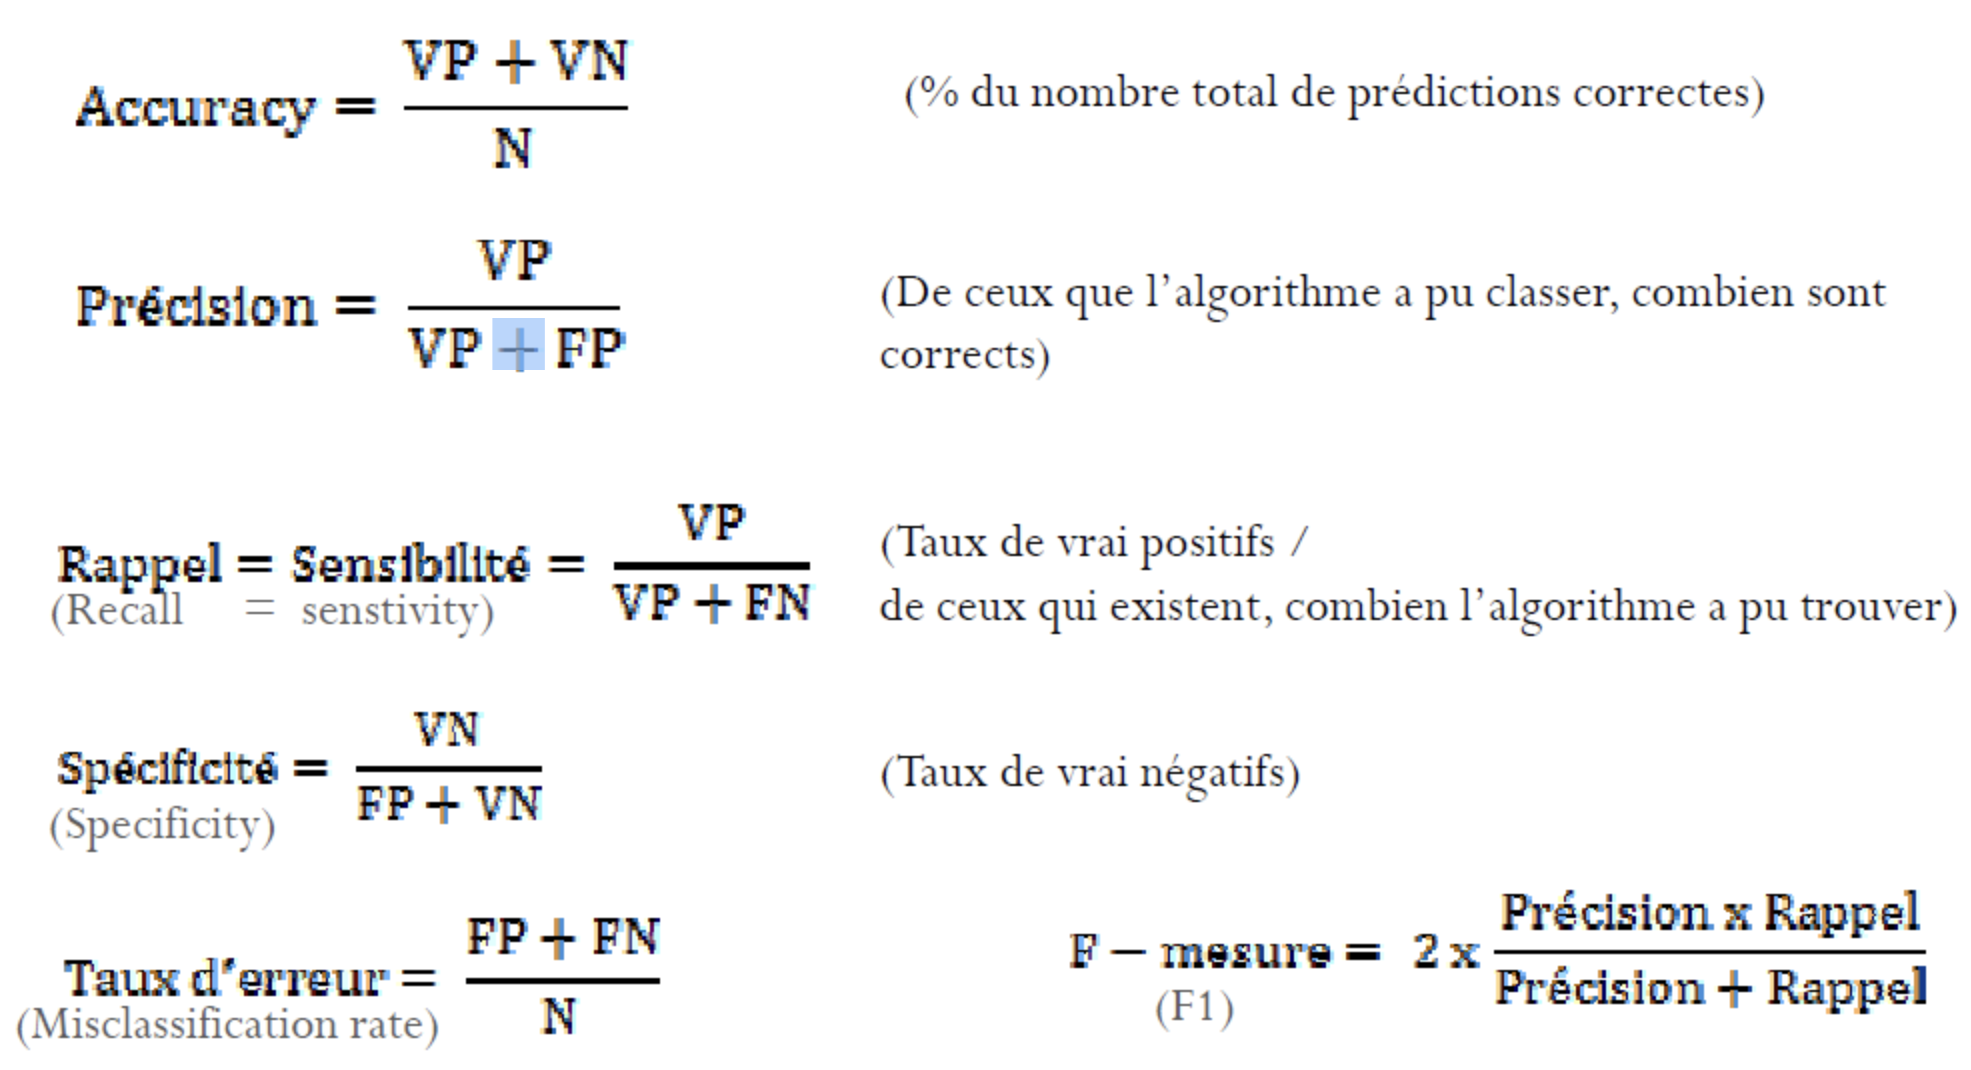

In [95]:
from IPython.display import Image
Image(filename='/opt/workspace/metrics.png')

In [96]:
#D'aprés les résultats obtenus, le modèle Gradient Bossted Trees est le plus précis pour notre problème de classification
# par rapport aux autres modèles que nous avons essayé.

In [16]:
pwd 

'/home/jovyan'

In [17]:
cd /home/jovyan/

/home/jovyan


In [18]:
ls

Projet-ML.ipynb  work/
